In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score as accsc

In [2]:
df = pd.read_csv("ibmemp.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
y = df['Attrition']
x = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber'], axis = 1)

In [5]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,80,0,17,3,2,9,6,0,8


In [6]:
labels = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
for label in labels:
    labelx = LabelEncoder()
    x[label] = labelx.fit_transform(x[label])
    

In [8]:
stdx = StandardScaler()
x = stdx.fit_transform(x)

In [9]:
labely = LabelEncoder()
y = labely.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split as tts

xtrain, xtest, ytrain, ytest = tts(x, y, test_size = .3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(xtrain, ytrain)

ypreddc = classifier.predict(xtest)

print(accsc(ypreddc, ytest))

0.7619047619047619


In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 8)

classifier.fit(xtrain, ytrain)

ypredknn = classifier.predict(xtest)

print(accsc(ypredknn, ytest))

0.8435374149659864


In [13]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

classifier.fit(xtrain, ytrain)

ypredsvc = classifier.predict(xtest)

print(accsc(ypredsvc, ytest))

0.8820861678004536


In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(xtrain, ytrain)

ypredrfc = classifier.predict(xtest)

print(accsc(ypredrfc, ytest))

0.8616780045351474


In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(xtrain, ytrain)

ypredlr = classifier.predict(xtest)

print(accsc(ypredlr, ytest))

0.8775510204081632


In [16]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(xtrain, ytrain)

yprednb = classifier.predict(xtest)

print(accsc(yprednb, ytest))

0.8140589569160998


In [17]:
x.shape

(1470, 32)

In [18]:
import time
start = time.time()
model = Sequential()

model.add(Dense(32, input_dim = 32, activation = 'relu'))
model.add(Dropout(.55))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(.55))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(xtrain, ytrain, epochs = 70,batch_size = 20, validation_data = (xtest, ytest))
end = time.time()

Epoch 1/70
52/52 [==============================] - 0s 6ms/step - loss: 0.7406 - accuracy: 0.6084 - val_loss: 0.4770 - val_accuracy: 0.8367
Epoch 2/70
52/52 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7561 - val_loss: 0.4415 - val_accuracy: 0.8390
Epoch 3/70
52/52 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7979 - val_loss: 0.4268 - val_accuracy: 0.8390
Epoch 4/70
52/52 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.8027 - val_loss: 0.4174 - val_accuracy: 0.8390
Epoch 5/70
52/52 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.8076 - val_loss: 0.4111 - val_accuracy: 0.8390
Epoch 6/70
52/52 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.8163 - val_loss: 0.4050 - val_accuracy: 0.8390
Epoch 7/70
52/52 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.8319 - val_loss: 0.3987 - val_accuracy: 0.8390
Epoch 8/70
52/52 [==

52/52 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8688 - val_loss: 0.3330 - val_accuracy: 0.8639
Epoch 60/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8649 - val_loss: 0.3317 - val_accuracy: 0.8662
Epoch 61/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8737 - val_loss: 0.3326 - val_accuracy: 0.8662
Epoch 62/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8688 - val_loss: 0.3296 - val_accuracy: 0.8685
Epoch 63/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8698 - val_loss: 0.3305 - val_accuracy: 0.8662
Epoch 64/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8659 - val_loss: 0.3297 - val_accuracy: 0.8685
Epoch 65/70
52/52 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.8649 - val_loss: 0.3278 - val_accuracy: 0.8707
Epoch 66/70
52/52 [======

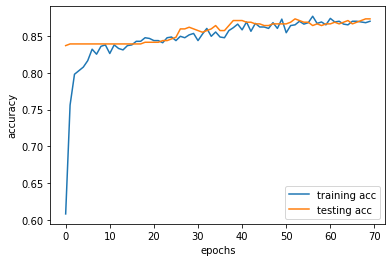

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'training acc')
plt.plot(history.history['val_accuracy'], label = 'testing acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

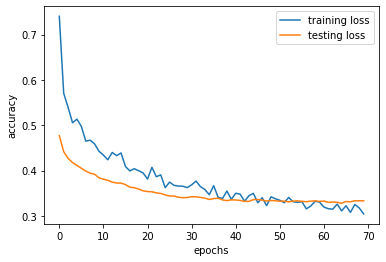

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'testing loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
model.save("ibm/hrananlytic")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ibm/hrananlytic\assets


In [22]:
print(end - start)

16.58890128135681
